In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# The Power of Two Choices

## 1.)

In [3]:
def add_ball(bins, M, k, special=False, verbose=False):
    """
        bins:    Array that represents the different bins.
        M:       number of bins to sample
        k:       number of balls to add in the bins.
        special: special selection according to point 4.
        See p1 pdf for describtion.
    """
    if verbose: print(f"bins start: {bins}")
    if special:
        bins_selected = np.array([np.random.randint(0,len(bins)//2), np.random.randint(len(bins)//2,len(bins))])
    else:
        bins_selected = np.random.randint(0,bins.size,M)
    if verbose: print(f"bins selected: {bins_selected}")
    
    bin_values = bins[bins_selected] # get values of selected bins
    bin_values_min = np.min(bin_values) # get minimal value
    bin_values_min_idx = np.where(bin_values == bin_values_min) # get idx of min values
    bin_idx = bins_selected[bin_values_min_idx] # get the bin idx for the min values from the selected bins
    
    if (special & bin_idx.size > 1): # if special and min idx is greater than 1 put it in the first bin
        bin_idx = bin_idx[0]
    
    for i in np.random.choice(bin_idx, k):
        bins[i] += 1
    
    if verbose: print(f"bins end: {bins}")
    return bins

In [4]:
N = 10

In [5]:
bins = np.zeros(N, int); bins

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
bins = add_ball(bins, 1, 1, special=False, verbose=True)
bins

bins start: [0 0 0 0 0 0 0 0 0 0]
bins selected: [4]
bins end: [0 0 0 0 1 0 0 0 0 0]


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [7]:
def run_exp(M, N, special=False, verbose=False):
    bins = np.zeros(N, int) # create empty bins
    for i in range(N): # cycle through and add balls
        add_ball(bins, M, 1, special, verbose) # k = 1 because we always add one ball
    maxs = np.max(bins) # get max bin count
    return bins, maxs

In [8]:
run_exp(1, 10)

(array([0, 1, 1, 1, 1, 0, 4, 0, 1, 1]), 4)

## 2.)

In [9]:
N = 10

In [10]:
bins = np.zeros(N, int); bins

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
bins = add_ball(bins, 2, 1, verbose=True)

bins start: [0 0 0 0 0 0 0 0 0 0]
bins selected: [2 5]
bins end: [0 0 1 0 0 0 0 0 0 0]


In [12]:
run_exp(2, 10) #, verbose=True)

(array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2]), 2)

## 3.)

In [13]:
N = 10

In [14]:
bins = np.zeros(N, int); bins

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
bins = add_ball(bins, 3, 1, verbose=True)

bins start: [0 0 0 0 0 0 0 0 0 0]
bins selected: [2 1 2]
bins end: [0 0 1 0 0 0 0 0 0 0]


In [16]:
run_exp(3, 10)

(array([1, 1, 1, 1, 1, 1, 0, 2, 0, 2]), 2)

## 4.)

In [17]:
N = 10

In [18]:
bins = np.zeros(N, int); bins

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
bins = add_ball(bins, 3, 1, special=True, verbose=True)

bins start: [0 0 0 0 0 0 0 0 0 0]
bins selected: [1 6]
bins end: [0 0 0 0 0 0 1 0 0 0]


In [20]:
run_exp(3, 10, special=True)

(array([1, 1, 2, 0, 1, 2, 1, 0, 1, 1]), 2)

# b.)

In [21]:
def get_exp(M, N, special=False):
    bins_list = []
    maxs_list = []
    for i in range(30):
        bins, maxs = run_exp(M, N, special=special)
        bins_list.append(bins)
        maxs_list.append(maxs)
    plt.hist(maxs_list);

In [22]:
N = 200_000

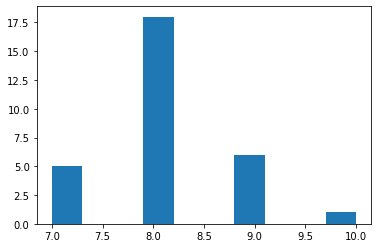

In [23]:
get_exp(1, N)

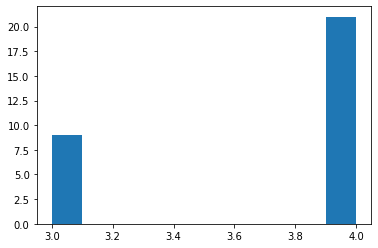

In [24]:
get_exp(2, N)

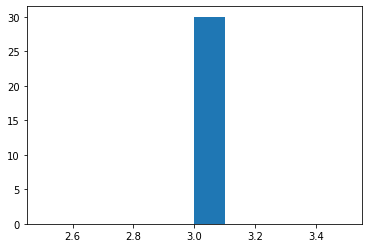

In [25]:
get_exp(3, N)

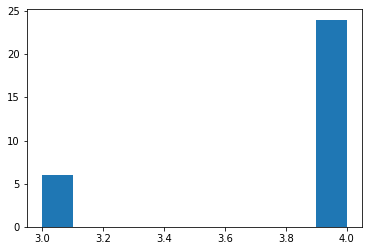

In [26]:
get_exp(3, N, special=True)